### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import datetime
import scipy.stats

%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

import warnings
warnings.filterwarnings('ignore')

#import feature_engine.missing_data_imputers as mdi
#from feature_engine.outlier_removers import Winsorizer
#from feature_engine import categorical_encoders as ce

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)

np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


In [2]:
df = pd.read_csv("data_technologies.csv")

In [3]:
df

,Respondent,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs
0,4,C,C,MySQL,MySQL,Linux,Linux,NaN,NaN,Eclipse,NaN,NaN,NaN,NaN
1,4,C++,C#,SQLite,SQLite,Windows,Windows,NaN,NaN,Vim,NaN,NaN,NaN,NaN
2,4,C#,JavaScript,NaN,NaN,NaN,NaN,NaN,NaN,Visual Studio,NaN,NaN,NaN,NaN
3,4,Python,SQL,NaN,NaN,NaN,NaN,NaN,NaN,Visual Studio Code,NaN,NaN,NaN,NaN
4,4,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74584,25142,Go,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74585,25142,HTML/CSS,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74586,25142,PHP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74587,25142,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74589 entries, 0 to 74588
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Respondent              74589 non-null  int64  
 1   LanguageWorkedWith      59792 non-null  object 
 2   LanguageDesireNextYear  55764 non-null  object 
 3   DatabaseWorkedWith      31375 non-null  object 
 4   DatabaseDesireNextYear  29575 non-null  object 
 5   PlatformWorkedWith      39208 non-null  object 
 6   PlatformDesireNextYear  44314 non-null  object 
 7   WebFrameWorkedWith      24803 non-null  object 
 8   WebFrameDesireNextYear  24567 non-null  object 
 9   DevEnviron              33306 non-null  object 
 10  OpSys                   0 non-null      float64
 11  Containers              0 non-null      float64
 12  BlockchainOrg           0 non-null      float64
 13  BlockchainIs            0 non-null      float64
dtypes: float64(4), int64(1), object(9)
mem

In [5]:
df.describe()

,Respondent,OpSys,Containers,BlockchainOrg,BlockchainIs
count,74589.000000,0.0,0.0,0.0,0.0
mean,12435.258228,NaN,NaN,NaN,NaN
std,7239.729251,NaN,NaN,NaN,NaN
min,4.000000,NaN,NaN,NaN,NaN
25%,6196.000000,NaN,NaN,NaN,NaN
50%,12422.000000,NaN,NaN,NaN,NaN
75%,18756.000000,NaN,NaN,NaN,NaN
max,25142.000000,NaN,NaN,NaN,NaN


In [6]:
df.columns

Index(['Respondent', 'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith', 'DatabaseDesireNextYear', 'PlatformWorkedWith', 'PlatformDesireNextYear', 'WebFrameWorkedWith', 'WebFrameDesireNextYear', 'DevEnviron', 'OpSys', 'Containers', 'BlockchainOrg', 'BlockchainIs'], dtype='object')

In [7]:
df.groupby(by="Respondent").count()

,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs
Respondent,,,,,,,,,,,,,
4,5,4,2,2,2,2,0,0,4,0,0,0,0
9,11,10,3,3,6,7,3,3,1,0,0,0,0
13,6,7,4,3,11,8,5,2,4,0,0,0,0
16,6,6,3,4,0,3,3,3,2,0,0,0,0
17,4,6,2,4,5,1,3,5,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25136,6,6,1,1,3,2,2,1,4,0,0,0,0
25137,4,4,1,3,1,3,0,1,4,0,0,0,0
25138,11,2,1,0,3,2,0,0,2,0,0,0,0


In [8]:
respondent = pd.DataFrame(df.groupby(by="Respondent").count())

In [9]:
respondent.reset_index()

,Respondent,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs
0,4,5,4,2,2,2,2,0,0,4,0,0,0,0
1,9,11,10,3,3,6,7,3,3,1,0,0,0,0
2,13,6,7,4,3,11,8,5,2,4,0,0,0,0
3,16,6,6,3,4,0,3,3,3,2,0,0,0,0
4,17,4,6,2,4,5,1,3,5,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11393,25136,6,6,1,1,3,2,2,1,4,0,0,0,0
11394,25137,4,4,1,3,1,3,0,1,4,0,0,0,0
11395,25138,11,2,1,0,3,2,0,0,2,0,0,0,0
11396,25141,10,3,2,4,3,6,4,3,3,0,0,0,0


In [10]:
#respondent.to_csv("respondent.csv",index=False)

In [11]:
df.groupby(by="LanguageWorkedWith")["Respondent"].count()

LanguageWorkedWith
Assembly                  437
Bash/Shell/PowerShell    4642
C                        1578
C#                       4288
C++                      1946
Clojure                   164
Dart                      237
Elixir                    187
Erlang                     98
F#                        158
Go                       1114
HTML/CSS                 7830
Java                     4506
JavaScript               8687
Kotlin                    751
Objective-C               518
Other(s):                 840
PHP                      2913
Python                   4542
R                         585
Ruby                     1149
Rust                      324
SQL                      7106
Scala                     492
Swift                     707
TypeScript               3232
VBA                       628
WebAssembly               133
Name: Respondent, dtype: int64

In [12]:
language1 = pd.DataFrame(df.groupby(by="LanguageWorkedWith")["Respondent"].count())

In [13]:
language1.sort_values(by="Respondent",ascending=False)

,Respondent
LanguageWorkedWith,
JavaScript,8687
HTML/CSS,7830
SQL,7106
Bash/Shell/PowerShell,4642
Python,4542
Java,4506
C#,4288
TypeScript,3232
PHP,2913


In [14]:
top5lang1 = pd.DataFrame(language1.nlargest(5, "Respondent"))

In [15]:
top5lang1.reset_index(inplace=True)

In [16]:
top5lang1.rename(columns={"Respondent":"Count"},inplace=True)
top5lang1

,LanguageWorkedWith,Count
0,JavaScript,8687
1,HTML/CSS,7830
2,SQL,7106
3,Bash/Shell/PowerShell,4642
4,Python,4542


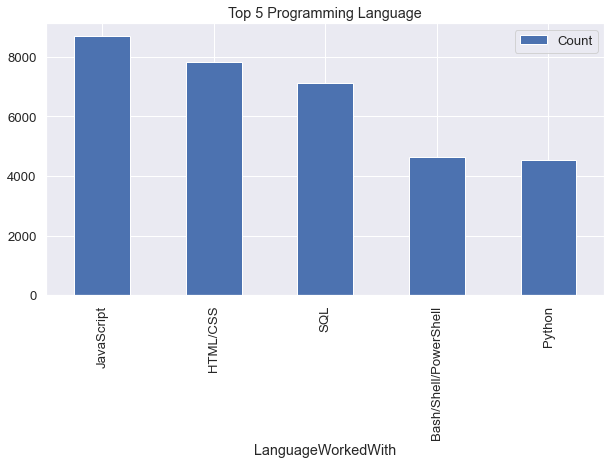

In [17]:
top5lang1.plot(kind="bar", x="LanguageWorkedWith", y="Count", figsize=(10,5))
plt.title("Top 5 Programming Language")
plt.show()

In [18]:
df.groupby(by="LanguageDesireNextYear")["Respondent"].count()

LanguageDesireNextYear
Assembly                  336
Bash/Shell/PowerShell    3097
C                        1028
C#                       3591
C++                      1633
Clojure                   413
Dart                      610
Elixir                    620
Erlang                    310
F#                        621
Go                       2759
HTML/CSS                 5328
Java                     2953
JavaScript               6630
Kotlin                   1890
Objective-C               310
Other(s):                 836
PHP                      1457
Python                   5239
R                         850
Ruby                     1029
Rust                     1520
SQL                      5012
Scala                     879
Swift                    1179
TypeScript               4088
VBA                       149
WebAssembly              1397
Name: Respondent, dtype: int64

In [19]:
language2 = pd.DataFrame(df.groupby(by="LanguageDesireNextYear")["Respondent"].count())

In [20]:
language2.sort_values(by="Respondent",ascending=False)

,Respondent
LanguageDesireNextYear,
JavaScript,6630
HTML/CSS,5328
Python,5239
SQL,5012
TypeScript,4088
C#,3591
Bash/Shell/PowerShell,3097
Java,2953
Go,2759


In [21]:
top5lang2 = pd.DataFrame(language2.nlargest(5, "Respondent"))

In [22]:
top5lang2.reset_index(inplace=True)

In [23]:
top5lang2.rename(columns={"Respondent":"Count"},inplace=True)
top5lang2

,LanguageDesireNextYear,Count
0,JavaScript,6630
1,HTML/CSS,5328
2,Python,5239
3,SQL,5012
4,TypeScript,4088


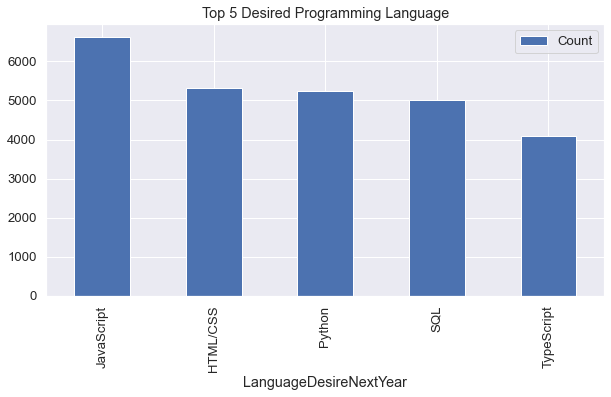

In [24]:
top5lang2.plot(kind="bar", x="LanguageDesireNextYear", y="Count", figsize=(10,5))
plt.title("Top 5 Desired Programming Language")
plt.show()

In [25]:
df.groupby(by="DatabaseWorkedWith")["Respondent"].count()

DatabaseWorkedWith
Cassandra                397
Couchbase                250
DynamoDB                 831
Elasticsearch           1954
Firebase                1314
MariaDB                 1709
Microsoft SQL Server    4110
MongoDB                 3016
MySQL                   5469
Oracle                  1744
Other(s):                728
PostgreSQL              4097
Redis                   2508
SQLite                  3248
Name: Respondent, dtype: int64

In [26]:
database1 = pd.DataFrame(df.groupby(by="DatabaseWorkedWith")["Respondent"].count())

In [27]:
database1.sort_values(by="Respondent",ascending=False)

,Respondent
DatabaseWorkedWith,
MySQL,5469
Microsoft SQL Server,4110
PostgreSQL,4097
SQLite,3248
MongoDB,3016
Redis,2508
Elasticsearch,1954
Oracle,1744
MariaDB,1709


In [28]:
top5d1 = pd.DataFrame(database1.nlargest(5, "Respondent"))

In [29]:
top5d1.reset_index(inplace=True)

In [30]:
top5d1.rename(columns={"Respondent":"Count"},inplace=True)
top5d1

,DatabaseWorkedWith,Count
0,MySQL,5469
1,Microsoft SQL Server,4110
2,PostgreSQL,4097
3,SQLite,3248
4,MongoDB,3016


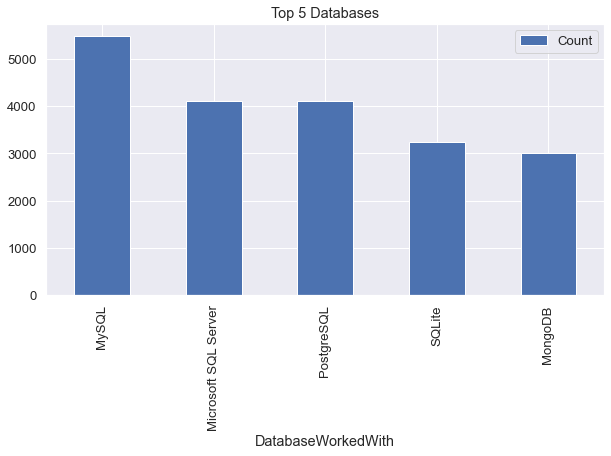

In [31]:
top5d1.plot(kind="bar", x="DatabaseWorkedWith", y="Count", figsize=(10,5))
plt.title("Top 5 Databases")
plt.show()

In [32]:
df.groupby(by="DatabaseDesireNextYear")["Respondent"].count()

DatabaseDesireNextYear
Cassandra               1003
Couchbase                390
DynamoDB                1044
Elasticsearch           2856
Firebase                1650
MariaDB                 1385
Microsoft SQL Server    2706
MongoDB                 3649
MySQL                   3281
Oracle                   870
Other(s):                645
PostgreSQL              4328
Redis                   3331
SQLite                  2437
Name: Respondent, dtype: int64

In [33]:
database2 = pd.DataFrame(df.groupby(by="DatabaseDesireNextYear")["Respondent"].count())

In [34]:
database2.sort_values(by="Respondent",ascending=False)

,Respondent
DatabaseDesireNextYear,
PostgreSQL,4328
MongoDB,3649
Redis,3331
MySQL,3281
Elasticsearch,2856
Microsoft SQL Server,2706
SQLite,2437
Firebase,1650
MariaDB,1385


In [35]:
top5d2 = pd.DataFrame(database2.nlargest(5, "Respondent"))

In [36]:
top5d2.reset_index(inplace=True)

In [37]:
top5d2.rename(columns={"Respondent":"Count"},inplace=True)
top5d2

,DatabaseDesireNextYear,Count
0,PostgreSQL,4328
1,MongoDB,3649
2,Redis,3331
3,MySQL,3281
4,Elasticsearch,2856


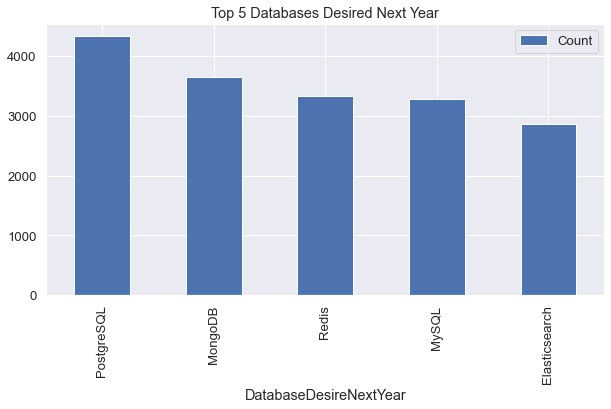

In [38]:
top5d2.plot(kind="bar", x="DatabaseDesireNextYear", y="Count", figsize=(10,5))
plt.title("Top 5 Databases Desired Next Year")
plt.show()

In [39]:
df.groupby(by="PlatformWorkedWith")["Respondent"].count()

PlatformWorkedWith
AWS                      3588
Android                  2693
Arduino                   914
Docker                   4378
Google Cloud Platform    1454
Heroku                   1268
IBM Cloud or Watson       215
Kubernetes               1238
Linux                    5811
MacOS                    2718
Microsoft Azure          1711
Other(s):                 329
Raspberry Pi             1614
Slack                    2786
Windows                  5563
WordPress                1490
iOS                      1438
Name: Respondent, dtype: int64

In [40]:
platform1 = pd.DataFrame(df.groupby(by="PlatformWorkedWith")["Respondent"].count())

In [41]:
platform1.sort_values(by="Respondent",ascending=False)

,Respondent
PlatformWorkedWith,
Linux,5811
Windows,5563
Docker,4378
AWS,3588
Slack,2786
MacOS,2718
Android,2693
Microsoft Azure,1711
Raspberry Pi,1614


In [42]:
top5platform1 = pd.DataFrame(platform1.nlargest(5, "Respondent"))

In [43]:
top5platform1.reset_index(inplace=True)

In [44]:
top5platform1.rename(columns={"Respondent":"Count"},inplace=True)
top5platform1

,PlatformWorkedWith,Count
0,Linux,5811
1,Windows,5563
2,Docker,4378
3,AWS,3588
4,Slack,2786


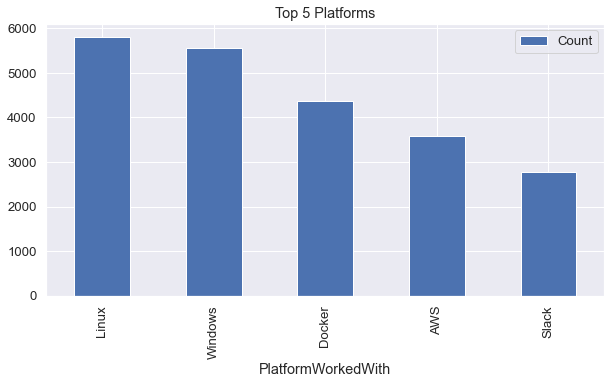

In [45]:
top5platform1.plot(kind="bar", x="PlatformWorkedWith", y="Count", figsize=(10,5))
plt.title("Top 5 Platforms")
plt.show()

In [46]:
df.groupby(by="PlatformDesireNextYear")["Respondent"].count()

PlatformDesireNextYear
AWS                      4442
Android                  3231
Arduino                  1399
Docker                   5804
Google Cloud Platform    2401
Heroku                   1121
IBM Cloud or Watson       373
Kubernetes               3201
Linux                    5865
MacOS                    2593
Microsoft Azure          2114
Other(s):                 307
Raspberry Pi             2525
Slack                    2359
Windows                  3888
WordPress                 704
iOS                      1987
Name: Respondent, dtype: int64

In [47]:
platform2 = pd.DataFrame(df.groupby(by="PlatformDesireNextYear")["Respondent"].count())

In [48]:
platform2.sort_values(by="Respondent",ascending=False)

,Respondent
PlatformDesireNextYear,
Linux,5865
Docker,5804
AWS,4442
Windows,3888
Android,3231
Kubernetes,3201
MacOS,2593
Raspberry Pi,2525
Google Cloud Platform,2401


In [49]:
top5platform2 = pd.DataFrame(platform2.nlargest(5, "Respondent"))

In [50]:
top5platform2.reset_index(inplace=True)

In [51]:
top5platform2.rename(columns={"Respondent":"Count"},inplace=True)
top5platform2

,PlatformDesireNextYear,Count
0,Linux,5865
1,Docker,5804
2,AWS,4442
3,Windows,3888
4,Android,3231


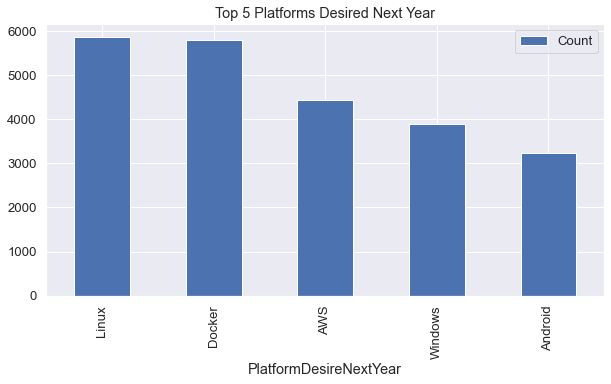

In [52]:
top5platform2.plot(kind="bar", x="PlatformDesireNextYear", y="Count", figsize=(10,5))
plt.title("Top 5 Platforms Desired Next Year")
plt.show()

In [53]:
df.groupby(by="WebFrameWorkedWith")["Respondent"].count()

WebFrameWorkedWith
ASP.NET               3042
Angular/Angular.js    3327
Django                1176
Drupal                 291
Express               2028
Flask                 1186
Laravel                939
Other(s):              814
React.js              3302
Ruby on Rails          856
Spring                1728
Vue.js                1485
jQuery                4629
Name: Respondent, dtype: int64

In [54]:
web1 = pd.DataFrame(df.groupby(by="WebFrameWorkedWith")["Respondent"].count())

In [55]:
web1.sort_values(by="Respondent",ascending=False)

,Respondent
WebFrameWorkedWith,
jQuery,4629
Angular/Angular.js,3327
React.js,3302
ASP.NET,3042
Express,2028
Spring,1728
Vue.js,1485
Flask,1186
Django,1176


In [56]:
webframe1 = pd.DataFrame(web1.nlargest(5, "Respondent"))

In [57]:
webframe1.reset_index(inplace=True)

In [58]:
webframe1.rename(columns={"Respondent":"Count"},inplace=True)
webframe1

,WebFrameWorkedWith,Count
0,jQuery,4629
1,Angular/Angular.js,3327
2,React.js,3302
3,ASP.NET,3042
4,Express,2028


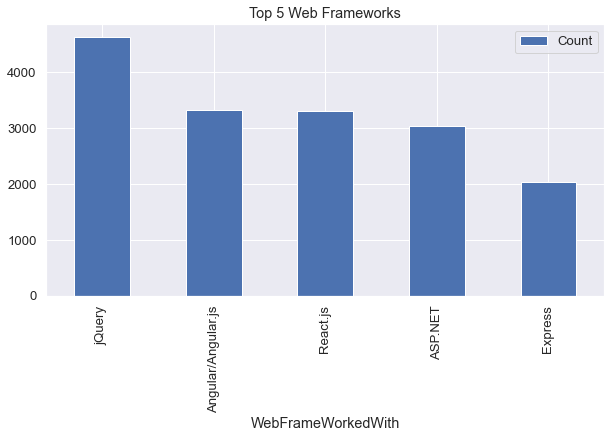

In [59]:
webframe1.plot(kind="bar", x="WebFrameWorkedWith", y="Count", figsize=(10,5))
plt.title("Top 5 Web Frameworks")
plt.show()

In [60]:
df.groupby(by="WebFrameDesireNextYear")["Respondent"].count()

WebFrameDesireNextYear
ASP.NET               2382
Angular/Angular.js    3059
Django                1504
Drupal                 168
Express               1957
Flask                 1240
Laravel                863
Other(s):              762
React.js              4714
Ruby on Rails          970
Spring                1564
Vue.js                3143
jQuery                2241
Name: Respondent, dtype: int64

In [61]:
web2 = pd.DataFrame(df.groupby(by="WebFrameDesireNextYear")["Respondent"].count())
web2

,Respondent
WebFrameDesireNextYear,
ASP.NET,2382
Angular/Angular.js,3059
Django,1504
Drupal,168
Express,1957
Flask,1240
Laravel,863
Other(s):,762
React.js,4714


In [62]:
webframe2 = pd.DataFrame(web2.nlargest(5, "Respondent"))

In [63]:
webframe2.reset_index(inplace=True)

In [64]:
webframe2.rename(columns={"Respondent":"Count"},inplace=True)
webframe2

,WebFrameDesireNextYear,Count
0,React.js,4714
1,Vue.js,3143
2,Angular/Angular.js,3059
3,ASP.NET,2382
4,jQuery,2241


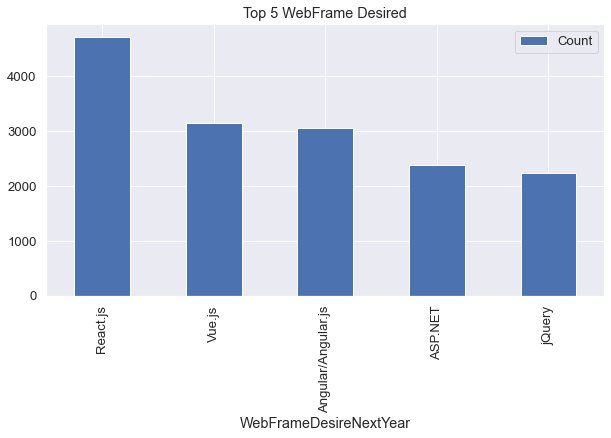

In [65]:
webframe2.plot(kind="bar", x="WebFrameDesireNextYear", y="Count", figsize=(10,5))
plt.title("Top 5 WebFrame Desired")
plt.show()

In [66]:
df.groupby(by="DevEnviron")["Respondent"].count()

DevEnviron
Android Studio        1691
Atom                  1322
Coda                    52
Eclipse               1373
Emacs                  448
IPython / Jupyter      995
IntelliJ              3094
Komodo                  25
Light Table              7
NetBeans               519
Notepad++             3439
PHPStorm               936
PyCharm               1448
RStudio                314
RubyMine               170
Sublime Text          2638
TextMate                74
Vim                   3040
Visual Studio         4027
Visual Studio Code    6639
Xcode                 1037
Zend                    18
Name: Respondent, dtype: int64

In [67]:
dev = pd.DataFrame(df.groupby(by="DevEnviron")["Respondent"].count())

In [68]:
dev.sort_values(by="Respondent",ascending=False)

,Respondent
DevEnviron,
Visual Studio Code,6639
Visual Studio,4027
Notepad++,3439
IntelliJ,3094
Vim,3040
Sublime Text,2638
Android Studio,1691
PyCharm,1448
Eclipse,1373


In [69]:
top5dev = pd.DataFrame(dev.nlargest(5, "Respondent"))

In [70]:
top5dev.reset_index(inplace=True)

In [71]:
top5dev.rename(columns={"Respondent":"Count"},inplace=True)
top5dev

,DevEnviron,Count
0,Visual Studio Code,6639
1,Visual Studio,4027
2,Notepad++,3439
3,IntelliJ,3094
4,Vim,3040


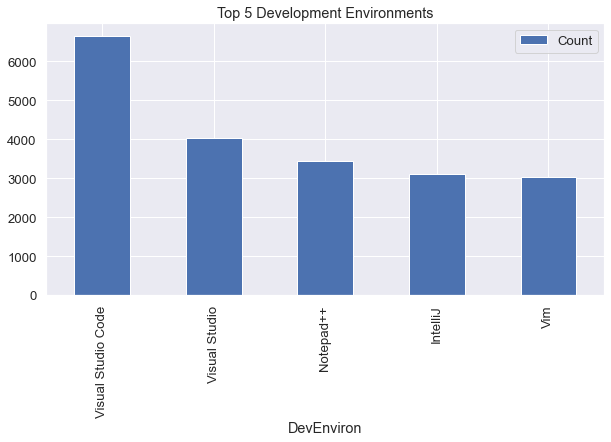

In [72]:
top5dev.plot(kind="bar", x="DevEnviron", y="Count", figsize=(10,5))
plt.title("Top 5 Development Environments")
plt.show()

In [73]:
df.groupby(by="OpSys")["Respondent"].count()

Series([], Name: Respondent, dtype: int64)

In [74]:
df.groupby(by="Containers")["Respondent"].count()

Series([], Name: Respondent, dtype: int64)

In [75]:
df.groupby(by="BlockchainOrg")["Respondent"].count()

Series([], Name: Respondent, dtype: int64)

In [76]:
df.groupby(by="BlockchainIs")["Respondent"].count()

Series([], Name: Respondent, dtype: int64)

## Data Visualization

### Univariate Data Exploration

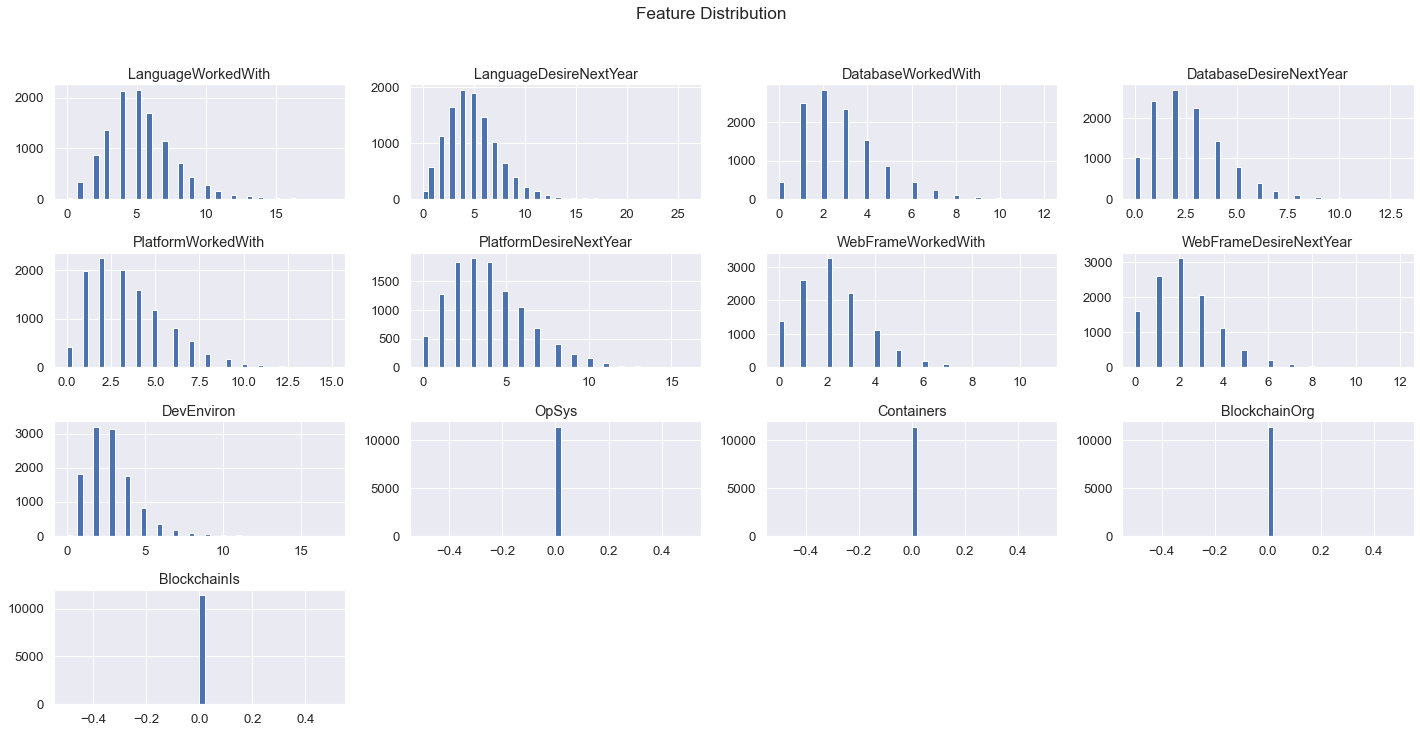

In [77]:
respondent.hist(bins=50, figsize=(20,10))
plt.suptitle('Feature Distribution', x=0.5, y=1.02, ha='center', fontsize='large')
plt.tight_layout()
plt.show()

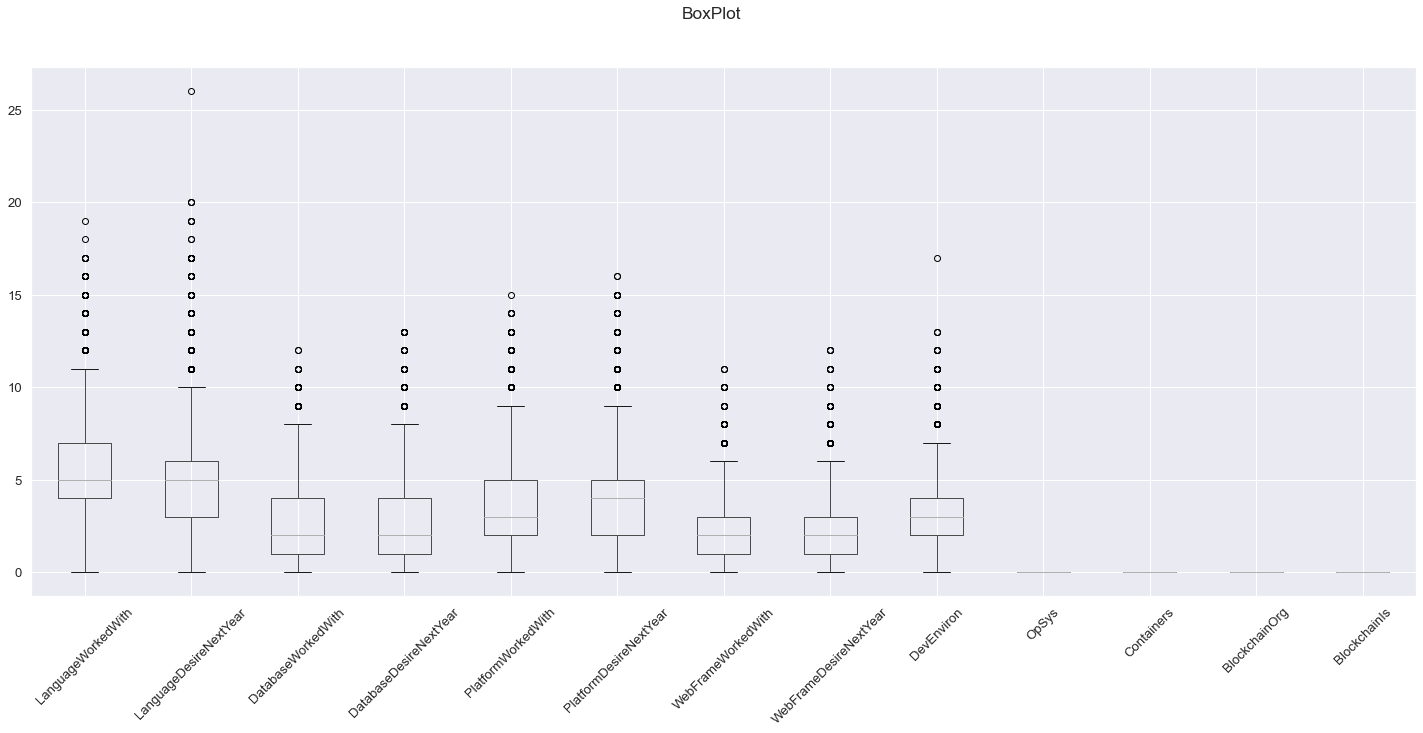

In [78]:
respondent.boxplot(figsize=(20,10))
plt.suptitle('BoxPlot', x=0.5, y=1.02, ha='center', fontsize='large')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Correlation

In [79]:
respondent.corr()

,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs
LanguageWorkedWith,1.000000,0.460792,0.415082,0.191688,0.407252,0.256206,0.367137,0.175266,0.321945,NaN,NaN,NaN,NaN
LanguageDesireNextYear,0.460792,1.000000,0.214022,0.419133,0.220766,0.446709,0.237915,0.418002,0.248577,NaN,NaN,NaN,NaN
DatabaseWorkedWith,0.415082,0.214022,1.000000,0.478161,0.458184,0.297837,0.409623,0.198955,0.252025,NaN,NaN,NaN,NaN
DatabaseDesireNextYear,0.191688,0.419133,0.478161,1.000000,0.228939,0.465375,0.253623,0.417094,0.210713,NaN,NaN,NaN,NaN
PlatformWorkedWith,0.407252,0.220766,0.458184,0.228939,1.000000,0.570037,0.335786,0.131975,0.248308,NaN,NaN,NaN,NaN
PlatformDesireNextYear,0.256206,0.446709,0.297837,0.465375,0.570037,1.000000,0.215265,0.365568,0.249996,NaN,NaN,NaN,NaN
WebFrameWorkedWith,0.367137,0.237915,0.409623,0.253623,0.335786,0.215265,1.000000,0.477229,0.142443,NaN,NaN,NaN,NaN
WebFrameDesireNextYear,0.175266,0.418002,0.198955,0.417094,0.131975,0.365568,0.477229,1.000000,0.176754,NaN,NaN,NaN,NaN
DevEnviron,0.321945,0.248577,0.252025,0.210713,0.248308,0.249996,0.142443,0.176754,1.000000,NaN,NaN,NaN,NaN
OpSys,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


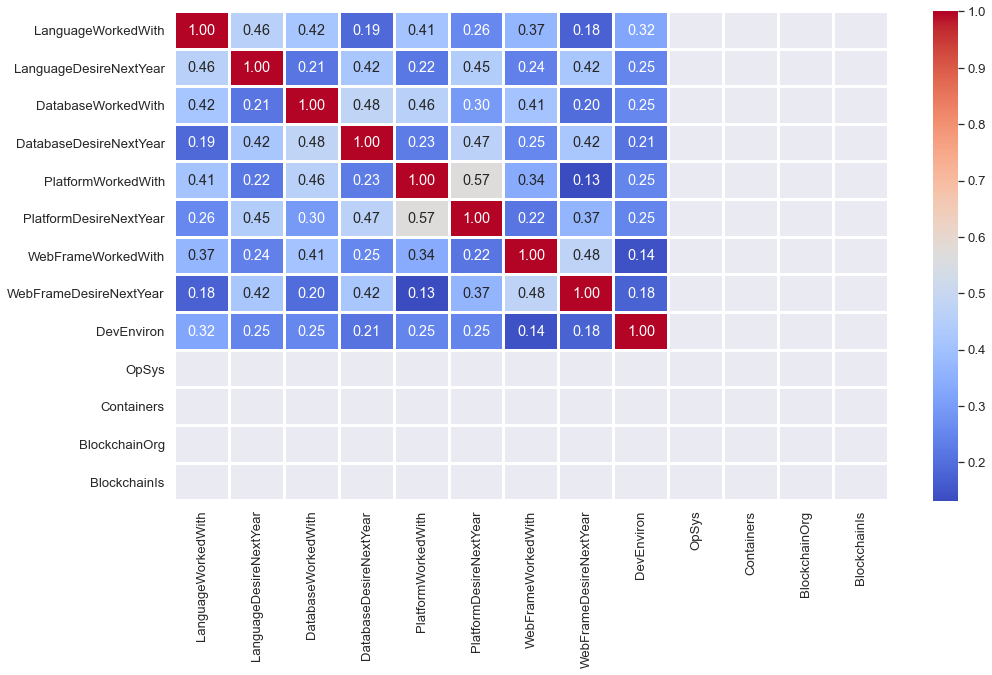

In [80]:
plt.figure(figsize=(16,9))
sns.heatmap(respondent.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.show()